In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *


In [2]:
folder_list = [ 'SummitData/GasGravity/Production2pc/R8/', 'SummitData/GasGravity/Production2pc/R8-0.2Zsol/',\
               'SummitData/GasGravity/Production2pc/R4/', 'SummitData/GasGravity/Production2pc/R4-0.2Zsol/',\
               'SummitData/GasGravity/Production2pc/R4-h75-0.2Zsol',\
                  'SetonixData/R16/4pc/', 'SetonixData/R16-0.2Zsol/',\
              'SummitData/GasGravity/Production2pc/R16-h300-Zsol/',\
              'SummitData/GasGravity/Production2pc/R16-h1kpc-Zsol/',\
              'SummitData/GasGravity/Production2pc/R16-h2kpc-Zsol/',\
              'SummitData/GasGravity/Production2pc/R16-h1.5kpc-Zsol/']


In [3]:
def get_folder_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # Skip if it is symbolic link
            if not os.path.islink(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

In [4]:
kk = 0 
sigma_sfr = [6.e-5/yr_to_sec , 6.e-5/yr_to_sec ,\
             0.000398107/yr_to_sec,  0.000398107/yr_to_sec, 1.58e-6/yr_to_sec,1.58e-6/yr_to_sec,\
            1.58e-6/yr_to_sec]   

folder = folder_list[-1]

data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', 'SetonixData/SN1a/')
# data_path = os.path.join('/scratch/jh2/av5889/sims/SetonixRuns/SN1a/')

os.chdir(data_path)
list_file = glob.glob("proj_y_plt*/")
Zunit = Msun/1.e3
infile   = os.path.join(data_path, 'metal_uniform.in')

dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))
dz = (dom_max[2]- dom_min[2])/(fac*int(ncells[2]))

timestep = np.zeros(len(list_file))

tot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
wtot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
htot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))

tot_scal_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
wtot_scal_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
htot_scal_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))

tot_scal_flux1 = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
wtot_scal_flux1 = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
htot_scal_flux1 = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))


tot_scal = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
tot_rho = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
tot_scal1 = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))


dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))


max_time=0.0
i=0
for f in list_file:
    inputfile = os.path.join(data_path, f)

    
    file_size = get_folder_size(inputfile) / (1024 * 1024)
        
    if(file_size<1.):
        print('Skipping ', inputfile, '\n')
        continue
        
    ds   = yt.load(inputfile)
    data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
    print(inputfile)
    curr_timestep = ds.current_time.to('Myr')
    if(curr_timestep>0.0):
        timestep[i] = ds.current_time.to('Myr')

        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]*dx
        wtot_mass_flux[i,:] = np.array(data['warm_mass_outflow'])[:,0,:]*dx
        htot_mass_flux[i,:] = np.array(data['hot_mass_outflow'])[:,0,:]*dx

        tot_scal_flux[i,:] = np.array(data['scalar0_outflow'])[:,0,:]*dx
        wtot_scal_flux[i,:] = np.array(data['warm_scalar0_outflow'])[:,0,:]*dx
        htot_scal_flux[i,:] = np.array(data['hot_scalar0_outflow'])[:,0,:]*dx

        tot_scal_flux1[i,:] = np.array(data['scalar1_outflow'])[:,0,:]*dx
        wtot_scal_flux1[i,:] = np.array(data['warm_scalar1_outflow'])[:,0,:]*dx
        htot_scal_flux1[i,:] = np.array(data['hot_scalar1_outflow'])[:,0,:]*dx

        tot_scal[i,:] = np.array(data['scalar0'])[:,0,:]*Zunit
        tot_scal1[i,:] = np.array(data['scalar1'])[:,0,:]*Zunit
        tot_rho[i,:] = np.array(data['rho'])[:,0,:]
        i+=1
    


yt : [INFO     ] 2024-10-14 09:58:41,349 Parameters: current_time              = 1363611969661651.2
yt : [INFO     ] 2024-10-14 09:58:41,354 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:58:41,355 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:58:41,357 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1240000/


yt : [INFO     ] 2024-10-14 09:58:44,675 Parameters: current_time              = 260387581375320.97
yt : [INFO     ] 2024-10-14 09:58:44,677 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:58:44,678 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:58:44,679 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt200000/


yt : [INFO     ] 2024-10-14 09:58:47,810 Parameters: current_time              = 1213538690615368.2
yt : [INFO     ] 2024-10-14 09:58:47,812 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:58:47,814 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:58:47,815 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1080000/


yt : [INFO     ] 2024-10-14 09:58:50,890 Parameters: current_time              = 730370589851043.1
yt : [INFO     ] 2024-10-14 09:58:50,891 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:58:50,893 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:58:50,896 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt630000/


yt : [INFO     ] 2024-10-14 09:58:54,100 Parameters: current_time              = 1576806756880198.2
yt : [INFO     ] 2024-10-14 09:58:54,102 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:58:54,104 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:58:54,105 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1460000/


yt : [INFO     ] 2024-10-14 09:58:56,567 Parameters: current_time              = 1194469857101172.8
yt : [INFO     ] 2024-10-14 09:58:56,568 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:58:56,570 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:58:56,571 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1060000/


yt : [INFO     ] 2024-10-14 09:58:59,707 Parameters: current_time              = 842426032798703.1
yt : [INFO     ] 2024-10-14 09:58:59,708 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:58:59,710 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:58:59,711 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt730000/


yt : [INFO     ] 2024-10-14 09:59:03,131 Parameters: current_time              = 1419659108462662.5
yt : [INFO     ] 2024-10-14 09:59:03,133 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:03,134 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:03,135 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1290000/


yt : [INFO     ] 2024-10-14 09:59:06,244 Parameters: current_time              = 1649580322714925.0
yt : [INFO     ] 2024-10-14 09:59:06,246 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:06,247 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:06,249 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1540000/


yt : [INFO     ] 2024-10-14 09:59:08,774 Parameters: current_time              = 617004574749804.2
yt : [INFO     ] 2024-10-14 09:59:08,776 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:08,777 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:08,778 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt530000/


yt : [INFO     ] 2024-10-14 09:59:12,062 Parameters: current_time              = 1595882371348101.5
yt : [INFO     ] 2024-10-14 09:59:12,064 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:12,066 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:12,067 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1480000/


yt : [INFO     ] 2024-10-14 09:59:14,190 Parameters: current_time              = 1568488272438183.5
yt : [INFO     ] 2024-10-14 09:59:14,192 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:14,193 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:14,194 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1450000/


yt : [INFO     ] 2024-10-14 09:59:16,549 Parameters: current_time              = 820723284102109.9
yt : [INFO     ] 2024-10-14 09:59:16,551 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:16,552 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:16,554 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt710000/


yt : [INFO     ] 2024-10-14 09:59:19,270 Parameters: current_time              = 1312825241996560.8
yt : [INFO     ] 2024-10-14 09:59:19,271 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:19,273 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:19,274 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1180000/


yt : [INFO     ] 2024-10-14 09:59:22,162 Parameters: current_time              = 1551057946497266.5
yt : [INFO     ] 2024-10-14 09:59:22,164 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:22,165 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:22,167 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1430000/


yt : [INFO     ] 2024-10-14 09:59:24,235 Parameters: current_time              = 820723284102109.9
yt : [INFO     ] 2024-10-14 09:59:24,237 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:24,238 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:24,240 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt710000.old.3596937/


yt : [INFO     ] 2024-10-14 09:59:27,133 Parameters: current_time              = 1074206508091938.9
yt : [INFO     ] 2024-10-14 09:59:27,134 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:27,136 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:27,137 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt930000/


yt : [INFO     ] 2024-10-14 09:59:30,033 Parameters: current_time              = 1223571323364346.5
yt : [INFO     ] 2024-10-14 09:59:30,035 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:30,036 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:30,038 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1750000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1090000/


yt : [INFO     ] 2024-10-14 09:59:32,941 Parameters: current_time              = 383007536725895.9
yt : [INFO     ] 2024-10-14 09:59:32,943 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:32,944 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:32,946 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt320000/


yt : [INFO     ] 2024-10-14 09:59:35,894 Parameters: current_time              = 1355837961462706.0
yt : [INFO     ] 2024-10-14 09:59:35,895 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:35,896 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:35,898 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1230000/


yt : [INFO     ] 2024-10-14 09:59:39,062 Parameters: current_time              = 524403747487560.0
yt : [INFO     ] 2024-10-14 09:59:39,063 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:39,065 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:39,066 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt450000/


yt : [INFO     ] 2024-10-14 09:59:42,295 Parameters: current_time              = 1383398275790195.8
yt : [INFO     ] 2024-10-14 09:59:42,297 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:42,298 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:42,300 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1260000/


yt : [INFO     ] 2024-10-14 09:59:45,514 Parameters: current_time              = 1254808891279725.5
yt : [INFO     ] 2024-10-14 09:59:45,516 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:45,517 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:45,519 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1120000/


yt : [INFO     ] 2024-10-14 09:59:48,724 Parameters: current_time              = 314784776612143.0
yt : [INFO     ] 2024-10-14 09:59:48,726 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:48,727 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:48,729 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt260000/


yt : [INFO     ] 2024-10-14 09:59:51,818 Parameters: current_time              = 1680703689991381.2
yt : [INFO     ] 2024-10-14 09:59:51,820 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:51,821 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:51,822 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1580000/


yt : [INFO     ] 2024-10-14 09:59:54,277 Parameters: current_time              = 1528712091380794.8
yt : [INFO     ] 2024-10-14 09:59:54,279 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:54,280 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:54,282 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2120000.old.1735420/ 

Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1800000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1410000/


yt : [INFO     ] 2024-10-14 09:59:57,018 Parameters: current_time              = 1172199777378864.2
yt : [INFO     ] 2024-10-14 09:59:57,020 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:57,021 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:57,023 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1720000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1030000/


yt : [INFO     ] 2024-10-14 09:59:59,736 Parameters: current_time              = 649803288970795.1
yt : [INFO     ] 2024-10-14 09:59:59,737 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 09:59:59,739 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 09:59:59,740 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt560000/


yt : [INFO     ] 2024-10-14 10:00:02,619 Parameters: current_time              = 662484721971625.0
yt : [INFO     ] 2024-10-14 10:00:02,620 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:02,622 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:02,623 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1980000/ 

Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2110000/ 

Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2060000/ 

Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1970000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt570000/


yt : [INFO     ] 2024-10-14 10:00:05,367 Parameters: current_time              = 453384542457750.2
yt : [INFO     ] 2024-10-14 10:00:05,368 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:05,370 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:05,371 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt390000/


yt : [INFO     ] 2024-10-14 10:00:08,011 Parameters: current_time              = 1539255990814156.2
yt : [INFO     ] 2024-10-14 10:00:08,013 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:08,015 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:08,016 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1420000/


yt : [INFO     ] 2024-10-14 10:00:10,830 Parameters: current_time              = 515019524118309.7
yt : [INFO     ] 2024-10-14 10:00:10,831 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:10,833 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:10,834 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt440000/


yt : [INFO     ] 2024-10-14 10:00:13,576 Parameters: current_time              = 443305289594215.0
yt : [INFO     ] 2024-10-14 10:00:13,578 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:13,579 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:13,581 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt380000/


yt : [INFO     ] 2024-10-14 10:00:16,167 Parameters: current_time              = 1623815328148141.5
yt : [INFO     ] 2024-10-14 10:00:16,168 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:16,170 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:16,171 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1510000/


yt : [INFO     ] 2024-10-14 10:00:18,216 Parameters: current_time              = 911133504323285.6
yt : [INFO     ] 2024-10-14 10:00:18,218 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:18,219 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:18,221 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1880000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt790000/


yt : [INFO     ] 2024-10-14 10:00:21,145 Parameters: current_time              = 1234551601404020.2
yt : [INFO     ] 2024-10-14 10:00:21,146 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:21,147 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:21,149 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1100000/


yt : [INFO     ] 2024-10-14 10:00:23,911 Parameters: current_time              = 743072321989338.4
yt : [INFO     ] 2024-10-14 10:00:23,912 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:23,914 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:23,915 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt640000/


yt : [INFO     ] 2024-10-14 10:00:26,827 Parameters: current_time              = 1767445849141076.0
yt : [INFO     ] 2024-10-14 10:00:26,828 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:26,830 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:26,831 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1670000/


yt : [INFO     ] 2024-10-14 10:00:28,878 Parameters: current_time              = 937717470245819.8
yt : [INFO     ] 2024-10-14 10:00:28,879 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:28,881 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:28,882 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1890000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt810000/


yt : [INFO     ] 2024-10-14 10:00:31,907 Parameters: current_time              = 88453541731702.52
yt : [INFO     ] 2024-10-14 10:00:31,909 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:31,910 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:31,912 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt40000/


yt : [INFO     ] 2024-10-14 10:00:35,129 Parameters: current_time              = 277617835976860.6
yt : [INFO     ] 2024-10-14 10:00:35,130 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:35,132 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:35,133 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt220000/


yt : [INFO     ] 2024-10-14 10:00:38,234 Parameters: current_time              = 975878024433179.6
yt : [INFO     ] 2024-10-14 10:00:38,236 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:38,238 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:38,239 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt840000/


yt : [INFO     ] 2024-10-14 10:00:40,992 Parameters: current_time              = 1424381517089532.8
yt : [INFO     ] 2024-10-14 10:00:40,993 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:40,995 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:40,996 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1300000/


yt : [INFO     ] 2024-10-14 10:00:43,794 Parameters: current_time              = 1484113347421271.8
yt : [INFO     ] 2024-10-14 10:00:43,796 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:43,797 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:43,798 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1360000/


yt : [INFO     ] 2024-10-14 10:00:46,481 Parameters: current_time              = 752439418389415.0
yt : [INFO     ] 2024-10-14 10:00:46,483 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:46,484 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:46,486 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2120000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt650000/


yt : [INFO     ] 2024-10-14 10:00:49,289 Parameters: current_time              = 481359492350902.94
yt : [INFO     ] 2024-10-14 10:00:49,290 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:49,292 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:49,293 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1990000/ 

Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1920000/ 

Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1810000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt410000/


yt : [INFO     ] 2024-10-14 10:00:52,127 Parameters: current_time              = 207682878281329.22
yt : [INFO     ] 2024-10-14 10:00:52,129 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:52,130 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:52,131 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt130000/


yt : [INFO     ] 2024-10-14 10:00:54,797 Parameters: current_time              = 1223571323364346.5
yt : [INFO     ] 2024-10-14 10:00:54,798 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:54,799 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:54,801 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1090000.old.5573110/


yt : [INFO     ] 2024-10-14 10:00:57,524 Parameters: current_time              = 69339982180967.65
yt : [INFO     ] 2024-10-14 10:00:57,526 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:00:57,527 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:00:57,529 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt30000/


yt : [INFO     ] 2024-10-14 10:01:00,466 Parameters: current_time              = 1407720261579493.0
yt : [INFO     ] 2024-10-14 10:01:00,468 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:00,469 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:00,470 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2140000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1280000/


yt : [INFO     ] 2024-10-14 10:01:03,445 Parameters: current_time              = 182149527445006.03
yt : [INFO     ] 2024-10-14 10:01:03,447 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:03,448 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:03,450 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt110000/


yt : [INFO     ] 2024-10-14 10:01:06,204 Parameters: current_time              = 807807189977985.0
yt : [INFO     ] 2024-10-14 10:01:06,206 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:06,207 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:06,209 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt700000/


yt : [INFO     ] 2024-10-14 10:01:09,740 Parameters: current_time              = 830947229980337.0
yt : [INFO     ] 2024-10-14 10:01:09,741 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:09,743 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:09,744 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt720000/


yt : [INFO     ] 2024-10-14 10:01:12,614 Parameters: current_time              = 432006480162919.5
yt : [INFO     ] 2024-10-14 10:01:12,616 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:12,617 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:12,619 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt370000/


yt : [INFO     ] 2024-10-14 10:01:15,597 Parameters: current_time              = 1602786750397120.2
yt : [INFO     ] 2024-10-14 10:01:15,599 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:15,600 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:15,601 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1490000/


yt : [INFO     ] 2024-10-14 10:01:17,714 Parameters: current_time              = 1433261219793471.5
yt : [INFO     ] 2024-10-14 10:01:17,716 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:17,717 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:17,718 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1310000/


yt : [INFO     ] 2024-10-14 10:01:21,006 Parameters: current_time              = 699001726464824.2
yt : [INFO     ] 2024-10-14 10:01:21,007 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:21,008 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:21,010 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt600000/


yt : [INFO     ] 2024-10-14 10:01:23,870 Parameters: current_time              = 1163252646138220.0
yt : [INFO     ] 2024-10-14 10:01:23,871 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:23,873 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:23,874 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1020000/


yt : [INFO     ] 2024-10-14 10:01:26,655 Parameters: current_time              = 797138383724436.0
yt : [INFO     ] 2024-10-14 10:01:26,656 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:26,658 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:26,659 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2090000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt690000/


yt : [INFO     ] 2024-10-14 10:01:29,445 Parameters: current_time              = 131108961709999.72
yt : [INFO     ] 2024-10-14 10:01:29,446 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:29,448 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:29,449 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt70000/


yt : [INFO     ] 2024-10-14 10:01:32,453 Parameters: current_time              = 1131753479567875.2
yt : [INFO     ] 2024-10-14 10:01:32,454 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:32,456 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:32,457 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt990000/


yt : [INFO     ] 2024-10-14 10:01:35,696 Parameters: current_time              = 1282862316613717.2
yt : [INFO     ] 2024-10-14 10:01:35,698 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:35,699 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:35,700 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1150000/


yt : [INFO     ] 2024-10-14 10:01:38,670 Parameters: current_time              = 559817823015195.5
yt : [INFO     ] 2024-10-14 10:01:38,672 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:38,673 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:38,674 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2010000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt480000/


yt : [INFO     ] 2024-10-14 10:01:41,478 Parameters: current_time              = 1727810516276878.5
yt : [INFO     ] 2024-10-14 10:01:41,480 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:41,481 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:41,482 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1630000/


yt : [INFO     ] 2024-10-14 10:01:43,549 Parameters: current_time              = 820723284102109.9
yt : [INFO     ] 2024-10-14 10:01:43,551 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:43,552 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:43,554 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt710000.old.6692206/


yt : [INFO     ] 2024-10-14 10:01:46,547 Parameters: current_time              = 325201153922185.44
yt : [INFO     ] 2024-10-14 10:01:46,549 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:46,550 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:46,551 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt270000/


yt : [INFO     ] 2024-10-14 10:01:49,465 Parameters: current_time              = 1559596895242533.5
yt : [INFO     ] 2024-10-14 10:01:49,467 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:49,468 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:49,470 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1440000/


yt : [INFO     ] 2024-10-14 10:01:51,481 Parameters: current_time              = 899209314087987.1
yt : [INFO     ] 2024-10-14 10:01:51,483 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:51,484 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:51,486 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2030000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt780000/


yt : [INFO     ] 2024-10-14 10:01:54,269 Parameters: current_time              = 1774638543311557.0
yt : [INFO     ] 2024-10-14 10:01:54,270 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:54,272 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:54,273 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1680000/


yt : [INFO     ] 2024-10-14 10:01:56,383 Parameters: current_time              = 1081948621019597.4
yt : [INFO     ] 2024-10-14 10:01:56,384 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:56,386 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:56,387 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt940000/


yt : [INFO     ] 2024-10-14 10:01:59,081 Parameters: current_time              = 1242792692602233.2
yt : [INFO     ] 2024-10-14 10:01:59,082 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:01:59,084 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:01:59,085 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1110000/


yt : [INFO     ] 2024-10-14 10:02:02,113 Parameters: current_time              = 1883357408411094.8
yt : [INFO     ] 2024-10-14 10:02:02,115 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:02,116 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:02,118 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1930000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1790000/


yt : [INFO     ] 2024-10-14 10:02:04,548 Parameters: current_time              = 149455716748527.2
yt : [INFO     ] 2024-10-14 10:02:04,549 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:04,550 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:04,552 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt80000/


yt : [INFO     ] 2024-10-14 10:02:07,434 Parameters: current_time              = 1852985104885091.0
yt : [INFO     ] 2024-10-14 10:02:07,436 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:07,437 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:07,439 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1760000/


yt : [INFO     ] 2024-10-14 10:02:09,448 Parameters: current_time              = 102858988883761.64
yt : [INFO     ] 2024-10-14 10:02:09,450 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:09,451 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:09,452 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt50000/


yt : [INFO     ] 2024-10-14 10:02:12,376 Parameters: current_time              = 1291635541025701.5
yt : [INFO     ] 2024-10-14 10:02:12,378 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:12,380 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:12,381 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1160000/


yt : [INFO     ] 2024-10-14 10:02:15,106 Parameters: current_time              = 226335406653009.78
yt : [INFO     ] 2024-10-14 10:02:15,107 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:15,109 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:15,110 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt160000/


yt : [INFO     ] 2024-10-14 10:02:18,149 Parameters: current_time              = 1144473326653450.8
yt : [INFO     ] 2024-10-14 10:02:18,151 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:18,152 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:18,154 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1000000/


yt : [INFO     ] 2024-10-14 10:02:21,411 Parameters: current_time              = 1504223040232200.2
yt : [INFO     ] 2024-10-14 10:02:21,413 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:21,414 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:21,416 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1380000/


yt : [INFO     ] 2024-10-14 10:02:24,275 Parameters: current_time              = 708661379414859.5
yt : [INFO     ] 2024-10-14 10:02:24,277 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:24,278 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:24,279 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt610000/


yt : [INFO     ] 2024-10-14 10:02:27,100 Parameters: current_time              = 2037688115067726.2
yt : [INFO     ] 2024-10-14 10:02:27,101 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:27,103 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:27,104 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1950000/


yt : [INFO     ] 2024-10-14 10:02:29,129 Parameters: current_time              = 628234002060834.4
yt : [INFO     ] 2024-10-14 10:02:29,131 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:29,132 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:29,134 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt540000/


yt : [INFO     ] 2024-10-14 10:02:31,830 Parameters: current_time              = 1612507520241090.0
yt : [INFO     ] 2024-10-14 10:02:31,832 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:31,834 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:31,835 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1500000/


yt : [INFO     ] 2024-10-14 10:02:33,851 Parameters: current_time              = 1708598928080075.0
yt : [INFO     ] 2024-10-14 10:02:33,853 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:33,854 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:33,855 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1610000/


yt : [INFO     ] 2024-10-14 10:02:35,875 Parameters: current_time              = 771611278764797.8
yt : [INFO     ] 2024-10-14 10:02:35,876 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:35,878 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:35,879 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt670000/


yt : [INFO     ] 2024-10-14 10:02:38,630 Parameters: current_time              = 1539255990814156.2
yt : [INFO     ] 2024-10-14 10:02:38,632 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:38,633 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:38,635 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1420000.old.1586032/


yt : [INFO     ] 2024-10-14 10:02:41,547 Parameters: current_time              = 1511960880006581.8
yt : [INFO     ] 2024-10-14 10:02:41,549 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:41,550 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:41,552 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1390000/


yt : [INFO     ] 2024-10-14 10:02:44,426 Parameters: current_time              = 993842532175812.1
yt : [INFO     ] 2024-10-14 10:02:44,427 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:44,428 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:44,430 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


Skipping  /g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2040000/ 

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt860000/


yt : [INFO     ] 2024-10-14 10:02:47,734 Parameters: current_time              = 858228534202248.9
yt : [INFO     ] 2024-10-14 10:02:47,736 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:47,738 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:47,739 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt750000/


yt : [INFO     ] 2024-10-14 10:02:50,509 Parameters: current_time              = 1347577528385613.2
yt : [INFO     ] 2024-10-14 10:02:50,511 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:50,512 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:50,514 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1220000/


yt : [INFO     ] 2024-10-14 10:02:53,276 Parameters: current_time              = 2027796220691117.5
yt : [INFO     ] 2024-10-14 10:02:53,278 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:53,279 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:53,280 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1940000/


yt : [INFO     ] 2024-10-14 10:02:55,428 Parameters: current_time              = 1042712784666607.9
yt : [INFO     ] 2024-10-14 10:02:55,430 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:55,431 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:55,433 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt900000/


yt : [INFO     ] 2024-10-14 10:02:58,720 Parameters: current_time              = 1465659862080525.0
yt : [INFO     ] 2024-10-14 10:02:58,723 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:02:58,725 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:02:58,726 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1340000/


yt : [INFO     ] 2024-10-14 10:03:01,768 Parameters: current_time              = 334992248286510.2
yt : [INFO     ] 2024-10-14 10:03:01,778 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:01,780 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:01,782 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt280000/


yt : [INFO     ] 2024-10-14 10:03:04,411 Parameters: current_time              = 2110738767043591.5
yt : [INFO     ] 2024-10-14 10:03:04,412 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:04,414 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:04,415 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2020000/


yt : [INFO     ] 2024-10-14 10:03:06,446 Parameters: current_time              = 1873385586080503.0
yt : [INFO     ] 2024-10-14 10:03:06,448 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:06,449 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:06,450 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1780000/


yt : [INFO     ] 2024-10-14 10:03:08,571 Parameters: current_time              = 1476642911477112.2
yt : [INFO     ] 2024-10-14 10:03:08,576 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:08,578 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:08,579 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1350000/


yt : [INFO     ] 2024-10-14 10:03:11,695 Parameters: current_time              = 369808893101069.3
yt : [INFO     ] 2024-10-14 10:03:11,696 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:11,697 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:11,699 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt310000/


yt : [INFO     ] 2024-10-14 10:03:14,466 Parameters: current_time              = 984573134090081.6
yt : [INFO     ] 2024-10-14 10:03:14,468 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:14,469 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:14,470 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt850000/


yt : [INFO     ] 2024-10-14 10:03:17,215 Parameters: current_time              = 232292604314502.12
yt : [INFO     ] 2024-10-14 10:03:17,217 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:17,218 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:17,220 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt170000/


yt : [INFO     ] 2024-10-14 10:03:19,897 Parameters: current_time              = 1033618898178654.8
yt : [INFO     ] 2024-10-14 10:03:19,898 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:19,899 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:19,901 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt890000/


yt : [INFO     ] 2024-10-14 10:03:22,518 Parameters: current_time              = 1659891349636507.0
yt : [INFO     ] 2024-10-14 10:03:22,519 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:22,522 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:22,524 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1550000/


yt : [INFO     ] 2024-10-14 10:03:24,515 Parameters: current_time              = 1942473119882773.5
yt : [INFO     ] 2024-10-14 10:03:24,517 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:24,518 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:24,520 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1850000/


yt : [INFO     ] 2024-10-14 10:03:26,643 Parameters: current_time              = 2000071625077053.2
yt : [INFO     ] 2024-10-14 10:03:26,645 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:26,646 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:26,648 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1910000/


yt : [INFO     ] 2024-10-14 10:03:28,780 Parameters: current_time              = 466517988673311.75
yt : [INFO     ] 2024-10-14 10:03:28,781 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:28,782 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:28,784 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt400000/


yt : [INFO     ] 2024-10-14 10:03:31,609 Parameters: current_time              = 307404281312122.4
yt : [INFO     ] 2024-10-14 10:03:31,611 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:31,613 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:31,614 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt250000/


yt : [INFO     ] 2024-10-14 10:03:34,599 Parameters: current_time              = 1373843156143366.8
yt : [INFO     ] 2024-10-14 10:03:34,601 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:34,603 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:34,604 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1250000/


yt : [INFO     ] 2024-10-14 10:03:37,494 Parameters: current_time              = 1700298617019529.5
yt : [INFO     ] 2024-10-14 10:03:37,496 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:37,497 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:37,499 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1600000/


yt : [INFO     ] 2024-10-14 10:03:39,543 Parameters: current_time              = 118326989308699.12
yt : [INFO     ] 2024-10-14 10:03:39,545 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:39,546 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:39,548 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt60000/


yt : [INFO     ] 2024-10-14 10:03:42,295 Parameters: current_time              = 2047930818468401.5
yt : [INFO     ] 2024-10-14 10:03:42,296 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:42,298 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:42,299 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1960000/


yt : [INFO     ] 2024-10-14 10:03:44,767 Parameters: current_time              = 1865597154726967.8
yt : [INFO     ] 2024-10-14 10:03:44,772 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:44,774 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:44,776 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1770000/


yt : [INFO     ] 2024-10-14 10:03:47,144 Parameters: current_time              = 1674346485723970.2
yt : [INFO     ] 2024-10-14 10:03:47,155 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:47,158 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:47,160 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1570000/


yt : [INFO     ] 2024-10-14 10:03:49,439 Parameters: current_time              = 221930598597350.28
yt : [INFO     ] 2024-10-14 10:03:49,441 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:49,443 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:49,445 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt150000/


yt : [INFO     ] 2024-10-14 10:03:52,273 Parameters: current_time              = 685867113474857.1
yt : [INFO     ] 2024-10-14 10:03:52,276 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:52,278 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:52,279 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt590000/


yt : [INFO     ] 2024-10-14 10:03:55,320 Parameters: current_time              = 925177584635891.1
yt : [INFO     ] 2024-10-14 10:03:55,331 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:55,334 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:55,336 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt800000/


yt : [INFO     ] 2024-10-14 10:03:58,264 Parameters: current_time              = 173160948858827.8
yt : [INFO     ] 2024-10-14 10:03:58,266 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:03:58,268 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:03:58,269 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt100000/


yt : [INFO     ] 2024-10-14 10:04:01,051 Parameters: current_time              = 1494758007659145.5
yt : [INFO     ] 2024-10-14 10:04:01,056 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:01,059 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:01,060 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1370000/


yt : [INFO     ] 2024-10-14 10:04:04,072 Parameters: current_time              = 546453713909976.4
yt : [INFO     ] 2024-10-14 10:04:04,080 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:04,084 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:04,085 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt470000/


yt : [INFO     ] 2024-10-14 10:04:07,082 Parameters: current_time              = 245095969652229.47
yt : [INFO     ] 2024-10-14 10:04:07,083 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:07,085 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:07,088 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt180000/


yt : [INFO     ] 2024-10-14 10:04:10,347 Parameters: current_time              = 1640032571812430.0
yt : [INFO     ] 2024-10-14 10:04:10,358 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:10,360 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:10,361 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1530000/


yt : [INFO     ] 2024-10-14 10:04:12,569 Parameters: current_time              = 495275568575274.7
yt : [INFO     ] 2024-10-14 10:04:12,572 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:12,577 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:12,579 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt420000/


yt : [INFO     ] 2024-10-14 10:04:15,561 Parameters: current_time              = 1454526748956878.2
yt : [INFO     ] 2024-10-14 10:04:15,566 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:15,568 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:15,569 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1330000/


yt : [INFO     ] 2024-10-14 10:04:18,441 Parameters: current_time              = 1203899744323487.0
yt : [INFO     ] 2024-10-14 10:04:18,450 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:18,451 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:18,453 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1070000/


yt : [INFO     ] 2024-10-14 10:04:21,997 Parameters: current_time              = 1988004236239336.2
yt : [INFO     ] 2024-10-14 10:04:22,001 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:22,002 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:22,004 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1900000/


yt : [INFO     ] 2024-10-14 10:04:24,349 Parameters: current_time              = 1301784560403503.8
yt : [INFO     ] 2024-10-14 10:04:24,351 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:24,355 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:24,357 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1170000/


yt : [INFO     ] 2024-10-14 10:04:27,267 Parameters: current_time              = 1156513722420173.0
yt : [INFO     ] 2024-10-14 10:04:27,280 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:27,281 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:27,283 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1010000/


yt : [INFO     ] 2024-10-14 10:04:30,201 Parameters: current_time              = 2162659413568924.0
yt : [INFO     ] 2024-10-14 10:04:30,203 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:30,206 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:30,208 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2080000/


yt : [INFO     ] 2024-10-14 10:04:32,283 Parameters: current_time              = 580356274659808.8
yt : [INFO     ] 2024-10-14 10:04:32,287 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:32,288 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:32,290 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt500000/


yt : [INFO     ] 2024-10-14 10:04:35,087 Parameters: current_time              = 1586480901211645.0
yt : [INFO     ] 2024-10-14 10:04:35,098 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:35,101 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:35,102 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1470000/


yt : [INFO     ] 2024-10-14 10:04:37,308 Parameters: current_time              = 638232478795761.5
yt : [INFO     ] 2024-10-14 10:04:37,311 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:37,315 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:37,316 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt550000/


yt : [INFO     ] 2024-10-14 10:04:40,111 Parameters: current_time              = 962615172830985.8
yt : [INFO     ] 2024-10-14 10:04:40,115 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:40,117 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:40,119 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt830000/


yt : [INFO     ] 2024-10-14 10:04:42,962 Parameters: current_time              = 783117063833521.9
yt : [INFO     ] 2024-10-14 10:04:42,972 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:42,976 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:42,977 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt680000/


yt : [INFO     ] 2024-10-14 10:04:45,809 Parameters: current_time              = 1953603927669494.5
yt : [INFO     ] 2024-10-14 10:04:45,812 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:45,815 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:45,817 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1860000/


yt : [INFO     ] 2024-10-14 10:04:47,925 Parameters: current_time              = 1055284389937185.6
yt : [INFO     ] 2024-10-14 10:04:47,930 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:47,931 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:47,933 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt910000/


yt : [INFO     ] 2024-10-14 10:04:51,025 Parameters: current_time              = 417865959418380.1
yt : [INFO     ] 2024-10-14 10:04:51,036 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:51,039 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:51,040 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt360000/


yt : [INFO     ] 2024-10-14 10:04:54,107 Parameters: current_time              = 1518969491382929.8
yt : [INFO     ] 2024-10-14 10:04:54,110 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:54,111 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:54,112 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1400000/


yt : [INFO     ] 2024-10-14 10:04:57,071 Parameters: current_time              = 196038812303616.8
yt : [INFO     ] 2024-10-14 10:04:57,080 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:57,081 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:57,083 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt120000/


yt : [INFO     ] 2024-10-14 10:04:59,809 Parameters: current_time              = 392670832684715.5
yt : [INFO     ] 2024-10-14 10:04:59,812 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:04:59,816 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:04:59,817 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt330000/


yt : [INFO     ] 2024-10-14 10:05:02,649 Parameters: current_time              = 1338977174041176.0
yt : [INFO     ] 2024-10-14 10:05:02,650 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:02,652 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:02,654 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1210000/


yt : [INFO     ] 2024-10-14 10:05:05,503 Parameters: current_time              = 721215270533905.1
yt : [INFO     ] 2024-10-14 10:05:05,505 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:05,507 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:05,508 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt620000/


yt : [INFO     ] 2024-10-14 10:05:08,946 Parameters: current_time              = 1061923286479265.2
yt : [INFO     ] 2024-10-14 10:05:08,957 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:08,960 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:08,961 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt920000/


yt : [INFO     ] 2024-10-14 10:05:11,908 Parameters: current_time              = 211717274851841.38
yt : [INFO     ] 2024-10-14 10:05:11,909 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:11,911 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:11,913 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt140000/


yt : [INFO     ] 2024-10-14 10:05:14,792 Parameters: current_time              = 1275189539404024.8
yt : [INFO     ] 2024-10-14 10:05:14,803 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:14,806 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:14,808 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1140000/


yt : [INFO     ] 2024-10-14 10:05:17,711 Parameters: current_time              = 1785546469214896.0
yt : [INFO     ] 2024-10-14 10:05:17,713 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:17,714 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:17,716 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1690000/


yt : [INFO     ] 2024-10-14 10:05:19,831 Parameters: current_time              = 1719496527926286.5
yt : [INFO     ] 2024-10-14 10:05:19,833 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:19,835 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:19,838 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1620000/


yt : [INFO     ] 2024-10-14 10:05:21,941 Parameters: current_time              = 2091611001551935.5
yt : [INFO     ] 2024-10-14 10:05:21,954 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:21,958 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:21,960 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2000000/


yt : [INFO     ] 2024-10-14 10:05:24,109 Parameters: current_time              = 2182683571654584.2
yt : [INFO     ] 2024-10-14 10:05:24,111 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:24,113 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:24,115 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2100000/


yt : [INFO     ] 2024-10-14 10:05:26,239 Parameters: current_time              = 872628468814784.1
yt : [INFO     ] 2024-10-14 10:05:26,251 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:26,254 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:26,255 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt760000/


yt : [INFO     ] 2024-10-14 10:05:29,206 Parameters: current_time              = 2139135229937721.8
yt : [INFO     ] 2024-10-14 10:05:29,210 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:29,212 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:29,214 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2050000/


yt : [INFO     ] 2024-10-14 10:05:31,432 Parameters: current_time              = 1111804534780105.5
yt : [INFO     ] 2024-10-14 10:05:31,444 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:31,447 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:31,449 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt970000/


yt : [INFO     ] 2024-10-14 10:05:34,742 Parameters: current_time              = 1920096692741645.2
yt : [INFO     ] 2024-10-14 10:05:34,745 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:34,748 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:34,750 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1830000/


yt : [INFO     ] 2024-10-14 10:05:36,966 Parameters: current_time              = 1802962811853680.5
yt : [INFO     ] 2024-10-14 10:05:36,969 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:36,970 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:36,972 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1710000/


yt : [INFO     ] 2024-10-14 10:05:39,042 Parameters: current_time              = 250937955296764.3
yt : [INFO     ] 2024-10-14 10:05:39,053 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:39,054 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:39,056 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt190000/


yt : [INFO     ] 2024-10-14 10:05:42,122 Parameters: current_time              = 2208265099607779.2
yt : [INFO     ] 2024-10-14 10:05:42,125 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:42,129 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:42,131 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2130000/


yt : [INFO     ] 2024-10-14 10:05:44,839 Parameters: current_time              = 1184783049264554.5
yt : [INFO     ] 2024-10-14 10:05:44,841 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:44,843 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:44,844 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1050000/


yt : [INFO     ] 2024-10-14 10:05:47,792 Parameters: current_time              = 949402945773401.8
yt : [INFO     ] 2024-10-14 10:05:47,796 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:47,797 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:47,799 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt820000/


yt : [INFO     ] 2024-10-14 10:05:50,637 Parameters: current_time              = 888356100895212.8
yt : [INFO     ] 2024-10-14 10:05:50,647 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:50,650 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:50,652 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt770000/


yt : [INFO     ] 2024-10-14 10:05:53,400 Parameters: current_time              = 164512368426051.8
yt : [INFO     ] 2024-10-14 10:05:53,407 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:53,410 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:53,412 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt90000/


yt : [INFO     ] 2024-10-14 10:05:56,156 Parameters: current_time              = 675497698311092.2
yt : [INFO     ] 2024-10-14 10:05:56,159 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:56,161 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:56,163 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt580000/


yt : [INFO     ] 2024-10-14 10:05:58,999 Parameters: current_time              = 409219971115387.94
yt : [INFO     ] 2024-10-14 10:05:59,005 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:05:59,007 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:05:59,008 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt350000/


yt : [INFO     ] 2024-10-14 10:06:01,855 Parameters: current_time              = 606122104107066.5
yt : [INFO     ] 2024-10-14 10:06:01,865 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:01,870 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:01,872 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt520000/


yt : [INFO     ] 2024-10-14 10:06:04,728 Parameters: current_time              = 1825804675953254.8
yt : [INFO     ] 2024-10-14 10:06:04,732 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:04,733 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:04,735 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1730000/


yt : [INFO     ] 2024-10-14 10:06:06,837 Parameters: current_time              = 1834196987387035.5
yt : [INFO     ] 2024-10-14 10:06:06,848 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:06,851 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:06,853 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1740000/


yt : [INFO     ] 2024-10-14 10:06:08,954 Parameters: current_time              = 1931801121000904.5
yt : [INFO     ] 2024-10-14 10:06:08,957 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:08,960 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:08,962 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1840000/


yt : [INFO     ] 2024-10-14 10:06:11,052 Parameters: current_time              = 1960979224842595.8
yt : [INFO     ] 2024-10-14 10:06:11,063 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:11,065 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:11,067 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1870000/


yt : [INFO     ] 2024-10-14 10:06:13,280 Parameters: current_time              = 1263637447367750.0
yt : [INFO     ] 2024-10-14 10:06:13,285 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:13,288 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:13,290 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1130000/


yt : [INFO     ] 2024-10-14 10:06:16,241 Parameters: current_time              = 1003097592598281.1
yt : [INFO     ] 2024-10-14 10:06:16,251 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:16,253 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:16,255 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt870000/


yt : [INFO     ] 2024-10-14 10:06:18,984 Parameters: current_time              = 1914682566166641.2
yt : [INFO     ] 2024-10-14 10:06:18,989 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:18,992 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:18,994 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1820000/


yt : [INFO     ] 2024-10-14 10:06:21,090 Parameters: current_time              = 535356881043359.9
yt : [INFO     ] 2024-10-14 10:06:21,092 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:21,094 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:21,095 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt460000/


yt : [INFO     ] 2024-10-14 10:06:24,165 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-10-14 10:06:24,178 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:24,181 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:24,183 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:24,254 Parameters: current_time              = 2155761558128659.5
yt : [INFO     ] 2024-10-14 10:06:24,255 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:24,256 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:24,258 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt00000/
/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2070000/


yt : [INFO     ] 2024-10-14 10:06:26,377 Parameters: current_time              = 1176060269843438.8
yt : [INFO     ] 2024-10-14 10:06:26,380 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:26,381 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:26,383 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1040000/


yt : [INFO     ] 2024-10-14 10:06:29,634 Parameters: current_time              = 34411089207434.457
yt : [INFO     ] 2024-10-14 10:06:29,646 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:29,651 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:29,653 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt10000/


yt : [INFO     ] 2024-10-14 10:06:32,717 Parameters: current_time              = 1395291895122694.8
yt : [INFO     ] 2024-10-14 10:06:32,721 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:32,722 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:32,723 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1270000/


yt : [INFO     ] 2024-10-14 10:06:36,000 Parameters: current_time              = 1690905406514517.8
yt : [INFO     ] 2024-10-14 10:06:36,009 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:36,012 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:36,015 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1590000/


yt : [INFO     ] 2024-10-14 10:06:38,074 Parameters: current_time              = 349061748533112.06
yt : [INFO     ] 2024-10-14 10:06:38,077 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:38,078 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:38,080 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt290000/


yt : [INFO     ] 2024-10-14 10:06:40,780 Parameters: current_time              = 286315610548418.94
yt : [INFO     ] 2024-10-14 10:06:40,790 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:40,794 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:40,796 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt230000/


yt : [INFO     ] 2024-10-14 10:06:43,608 Parameters: current_time              = 1792584149771373.8
yt : [INFO     ] 2024-10-14 10:06:43,619 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:43,622 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:43,623 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1700000/


yt : [INFO     ] 2024-10-14 10:06:45,868 Parameters: current_time              = 1633207794446008.8
yt : [INFO     ] 2024-10-14 10:06:45,870 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:45,872 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:45,873 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1520000/


yt : [INFO     ] 2024-10-14 10:06:48,154 Parameters: current_time              = 1441936907227490.5
yt : [INFO     ] 2024-10-14 10:06:48,167 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:48,170 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:48,172 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1320000/


yt : [INFO     ] 2024-10-14 10:06:51,036 Parameters: current_time              = 1330085593610671.8
yt : [INFO     ] 2024-10-14 10:06:51,037 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:51,040 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:51,042 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1200000/


yt : [INFO     ] 2024-10-14 10:06:54,281 Parameters: current_time              = 1094724910136074.5
yt : [INFO     ] 2024-10-14 10:06:54,294 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:54,297 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:54,298 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt950000/


yt : [INFO     ] 2024-10-14 10:06:57,639 Parameters: current_time              = 1019586502027515.0
yt : [INFO     ] 2024-10-14 10:06:57,652 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:06:57,655 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:06:57,657 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt880000/


yt : [INFO     ] 2024-10-14 10:07:00,706 Parameters: current_time              = 400049461179409.2
yt : [INFO     ] 2024-10-14 10:07:00,707 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:00,709 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:00,711 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt340000/


yt : [INFO     ] 2024-10-14 10:07:03,597 Parameters: current_time              = 360337859812965.44
yt : [INFO     ] 2024-10-14 10:07:03,609 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:03,613 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:03,615 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt300000/


yt : [INFO     ] 2024-10-14 10:07:06,421 Parameters: current_time              = 268007299983240.25
yt : [INFO     ] 2024-10-14 10:07:06,423 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:06,425 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:06,427 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt210000/


yt : [INFO     ] 2024-10-14 10:07:09,350 Parameters: current_time              = 850372824471690.9
yt : [INFO     ] 2024-10-14 10:07:09,363 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:09,366 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:09,368 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt740000/


yt : [INFO     ] 2024-10-14 10:07:12,896 Parameters: current_time              = 759295950346885.4
yt : [INFO     ] 2024-10-14 10:07:12,898 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:12,899 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:12,900 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt660000/


yt : [INFO     ] 2024-10-14 10:07:15,903 Parameters: current_time              = 506159996129425.9
yt : [INFO     ] 2024-10-14 10:07:15,915 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:15,919 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:15,921 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt430000/


yt : [INFO     ] 2024-10-14 10:07:18,735 Parameters: current_time              = 1120823758020350.1
yt : [INFO     ] 2024-10-14 10:07:18,745 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:18,749 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:18,750 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt980000/


yt : [INFO     ] 2024-10-14 10:07:21,737 Parameters: current_time              = 1738180587497408.5
yt : [INFO     ] 2024-10-14 10:07:21,739 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:21,740 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:21,742 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1640000/


yt : [INFO     ] 2024-10-14 10:07:23,856 Parameters: current_time              = 2202888345985239.0
yt : [INFO     ] 2024-10-14 10:07:23,869 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:23,873 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:23,874 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2120000.old.9845951/


yt : [INFO     ] 2024-10-14 10:07:26,088 Parameters: current_time              = 53393695211029.05
yt : [INFO     ] 2024-10-14 10:07:26,103 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:26,108 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:26,109 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt20000/


yt : [INFO     ] 2024-10-14 10:07:29,078 Parameters: current_time              = 593104385854608.5
yt : [INFO     ] 2024-10-14 10:07:29,083 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:29,085 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:29,086 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt510000/


yt : [INFO     ] 2024-10-14 10:07:32,052 Parameters: current_time              = 1667067386427888.2
yt : [INFO     ] 2024-10-14 10:07:32,067 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:32,070 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:32,071 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1560000/


yt : [INFO     ] 2024-10-14 10:07:34,243 Parameters: current_time              = 1745917641238025.8
yt : [INFO     ] 2024-10-14 10:07:34,255 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:34,257 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:34,258 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1650000/


yt : [INFO     ] 2024-10-14 10:07:36,398 Parameters: current_time              = 1754598165192276.8
yt : [INFO     ] 2024-10-14 10:07:36,414 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:36,416 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:36,417 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1660000/


yt : [INFO     ] 2024-10-14 10:07:38,683 Parameters: current_time              = 1104143281908561.6
yt : [INFO     ] 2024-10-14 10:07:38,697 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:38,700 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:38,702 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt960000/


yt : [INFO     ] 2024-10-14 10:07:42,015 Parameters: current_time              = 569072011529474.8
yt : [INFO     ] 2024-10-14 10:07:42,029 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:42,032 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:42,034 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt490000/


yt : [INFO     ] 2024-10-14 10:07:45,025 Parameters: current_time              = 1320307756394086.8
yt : [INFO     ] 2024-10-14 10:07:45,026 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:45,028 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:45,030 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt1190000/


yt : [INFO     ] 2024-10-14 10:07:47,961 Parameters: current_time              = 2224728942875521.5
yt : [INFO     ] 2024-10-14 10:07:47,973 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:47,975 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:47,977 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt2150000/


yt : [INFO     ] 2024-10-14 10:07:50,149 Parameters: current_time              = 298771397873021.2
yt : [INFO     ] 2024-10-14 10:07:50,164 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-14 10:07:50,168 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-14 10:07:50,169 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/proj_y_plt240000/


/jobfs/126707839.gadi-pbs/ipykernel_4151146/3230572526.py:85: RuntimeWarning: invalid value encountered in true_divide
  Ztot = (tot_scal/tot_rho)
/jobfs/126707839.gadi-pbs/ipykernel_4151146/3230572526.py:86: RuntimeWarning: invalid value encountered in true_divide
  Ztot1 = (tot_scal1/tot_rho)


In [51]:
sigma_sfr = 6.e-5/yr_to_sec 
tfinal = 1.0
harray = np.linspace(1.*kpc, 2.*kpc, 4) 
phi = np.zeros((timestep.shape[0], harray.shape[0]))
X, T, Z = np.meshgrid(timestep, xrange, zrange)
    
Sign = (Z/np.abs(Z))
sign = zrange/np.abs(zrange)

jj=0

for height in harray:

    vol_index = (np.abs(zrange)<height) 
    Volmask = (T>tfinal) * (np.abs(Z)<height)
    Tmask = (T>tfinal)
    index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))

    scalar_mass  = np.sum(np.ma.array(tot_scal, mask=~Volmask), axis=(1,2)).data   * dz 
    rho = np.sum(np.ma.array(tot_rho, mask=~Tmask), axis=(1,2)).data * dx * dz 


    mass_flux_z = np.sum(np.ma.array(tot_mass_flux, mask=~Volmask), axis=1).data 
    rev_mass_flux = mass_flux_z[:,]*sign
    rev_mass_flux = rev_mass_flux[:,::-1]
    mass_flux_tot = mass_flux_z + rev_mass_flux

    scal_flux_z = np.sum(np.ma.array(tot_scal_flux, mask=~Tmask), axis=1).data  * Zunit
    rev_scal_flux =  scal_flux_z[:,]*sign
    rev_scal_flux = rev_scal_flux[:,::-1]
    scal_flux_tot = scal_flux_z + rev_scal_flux


    print(scalar_mass.shape)
    Zinj = scalar_mass/ rho

    Mz   = scal_flux_tot[:,index]
    Mdot = mass_flux_tot[:,index]

    phi11 = ( (Mz - Mdot*Zinj)/sigma_sfr/Msun)
    phi[:,jj] = phi11
    jj+=1
    
mask = (phi==phi)
phi_avg = np.average(np.ma.array(phi, mask=~mask), axis=0).data
phi_16 = np.percentile(phi[mask], 16, axis=0)
phi_84 = np.percentile(phi[mask], 84, axis=0)

(222,)


/jobfs/126707839.gadi-pbs/ipykernel_4151146/4127365253.py:35: RuntimeWarning: invalid value encountered in true_divide
  Zinj = scalar_mass/ rho


(222,)
(222,)
(222,)


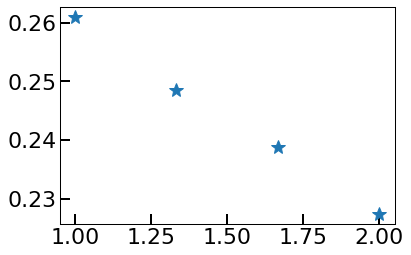

In [55]:
plt.plot(harray/kpc, phi_avg, '*', markersize=14)

/jobfs/126668423.gadi-pbs/ipykernel_2609942/3427488443.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(tot_rho),\
/jobfs/126668423.gadi-pbs/ipykernel_2609942/3427488443.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[1].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(hot_mass_flux)/1.e3,\
/jobfs/126668423.gadi-pbs/ipykernel_2609942/3427488443.py:30: MatplotlibDeprecationWarning: s

[-4.0, 4.0, -4.0, 4.0, -4.0, 4.0]

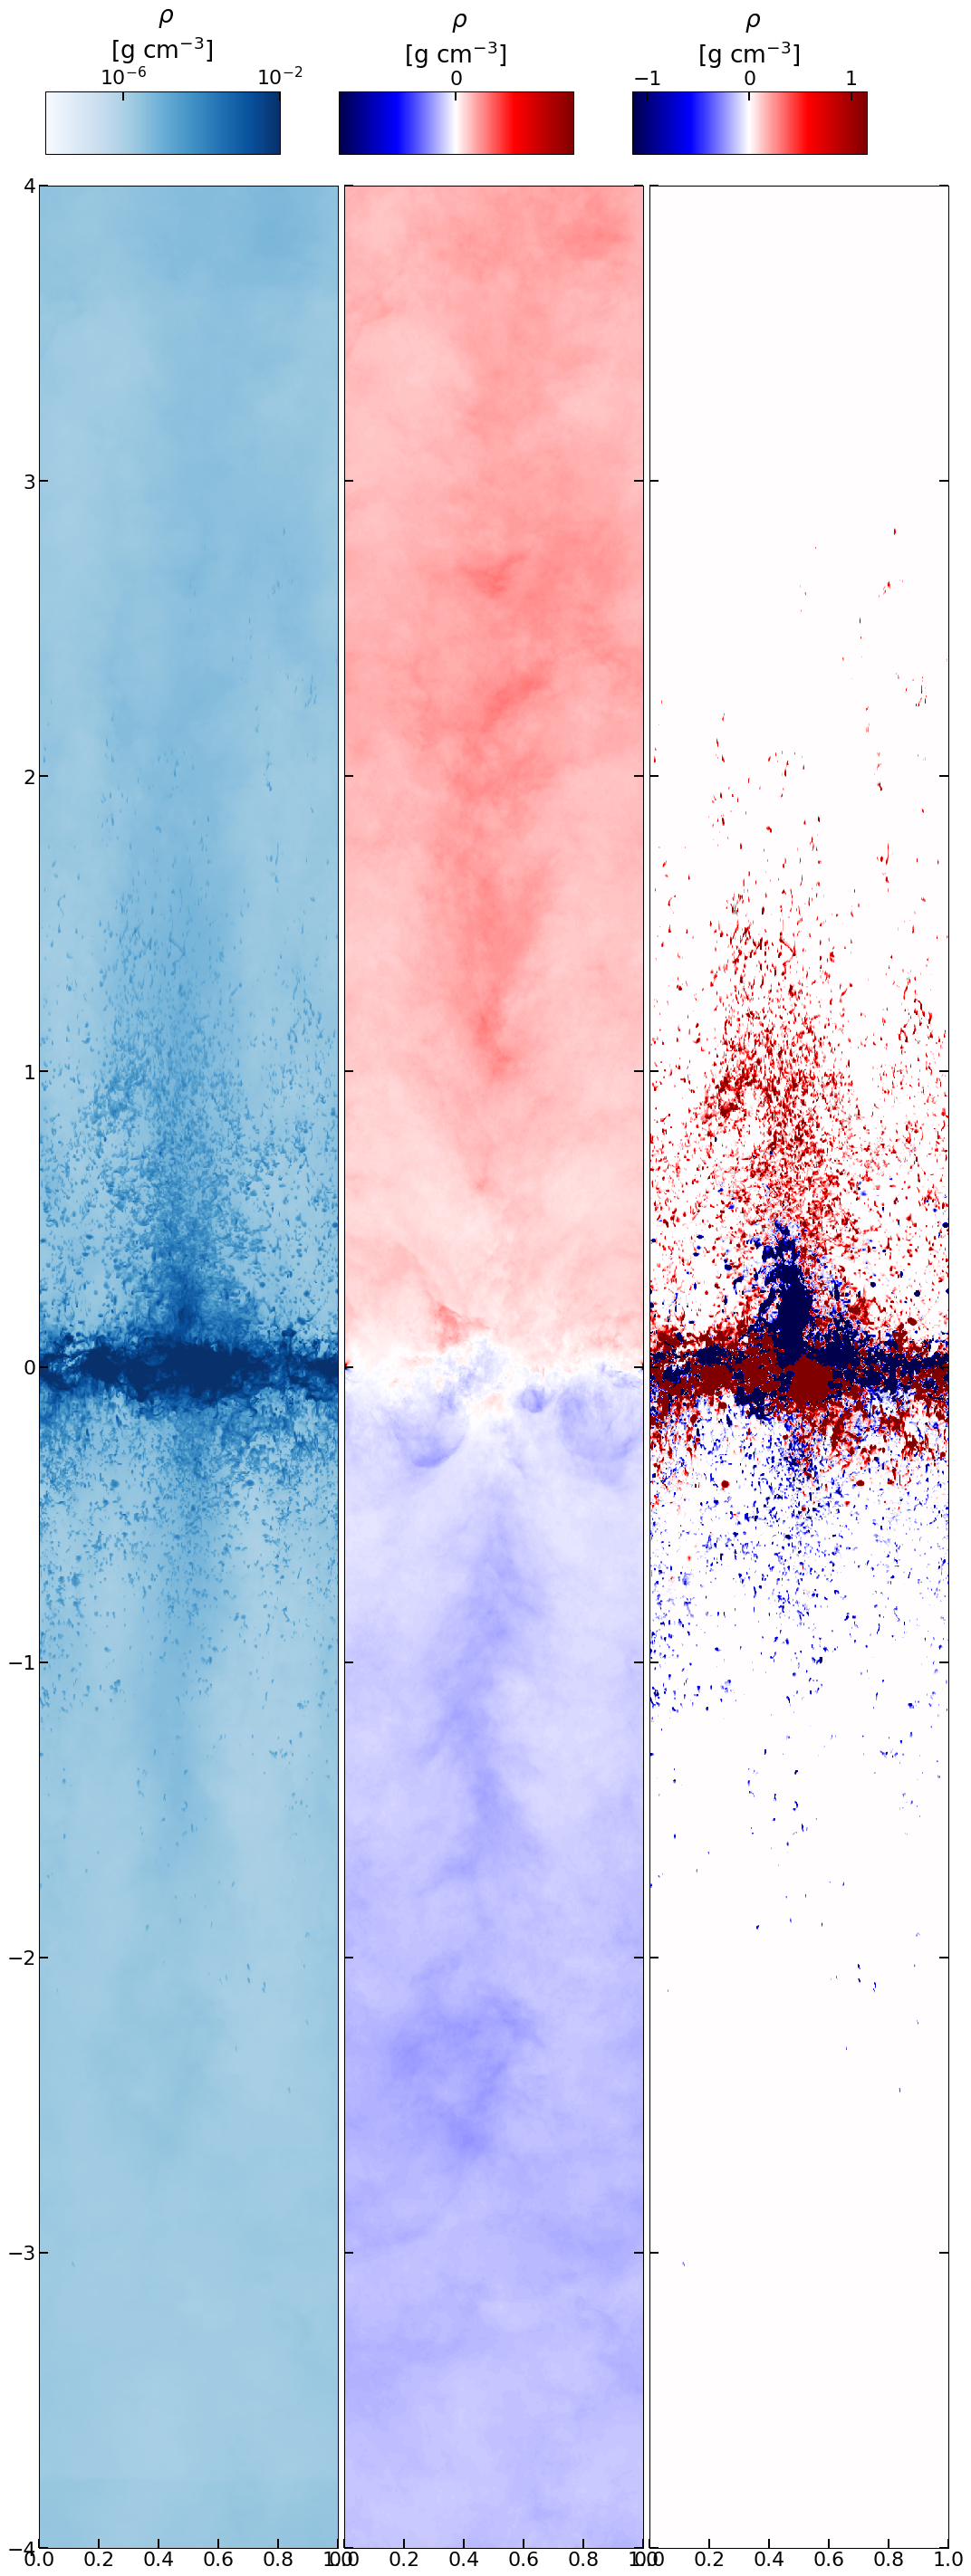

In [5]:
fig, ax = plt.subplots(1, 3, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(18, 48))
i=0

cbarx = 0.13
cbheight = 0.02
cbary = 0.89
cblen = 0.2
dx1 = 0.25
cbtitlex = 0.1
cbtitley = 16.5


plot = ax[0].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(tot_rho),\
                    norm=mcolors.LogNorm(vmin=1.e-8, vmax=1.e-2),
                    cmap='Blues')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-6,  1.e-2, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\rho$" + "\n" + "[g cm$^{-3}$]")


plot = ax[1].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(hot_mass_flux)/1.e3,\
                    vmin=-0.5, vmax=0.5,
                    cmap='seismic')
cax = fig.add_axes([cbarx + dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-1., 0.0, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\rho$" + "\n" + "[g cm$^{-3}$]")

plot = ax[2].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(warm_mass_flux)/1.e2,\
                    vmin=-1.15, vmax=1.15,
                    cmap='seismic')
cax = fig.add_axes([cbarx + 2.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-1., 0.0, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\rho$" + "\n" + "[g cm$^{-3}$]")


ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=True, left=True)
ax[2].tick_params(axis='y', labelleft=False, labelright=False, right=True, left=True)
plt.setp(ax, 'ylim', (-4., 4.))

In [67]:
np.amax(ratio-1), np.amin(ratio-1)

(77.39032767176629, -0.46515072294728843)

/jobfs/126707839.gadi-pbs/ipykernel_4151146/3066277368.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(Ztot),\
/jobfs/126707839.gadi-pbs/ipykernel_4151146/3066277368.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[1].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(Ztot1),\
/jobfs/126707839.gadi-pbs/ipykernel_4151146/3066277368.py:34: MatplotlibDeprecationWarning: shading='flat' wh

[-0.01, 4.0, -0.01, 4.0, -0.01, 4.0]

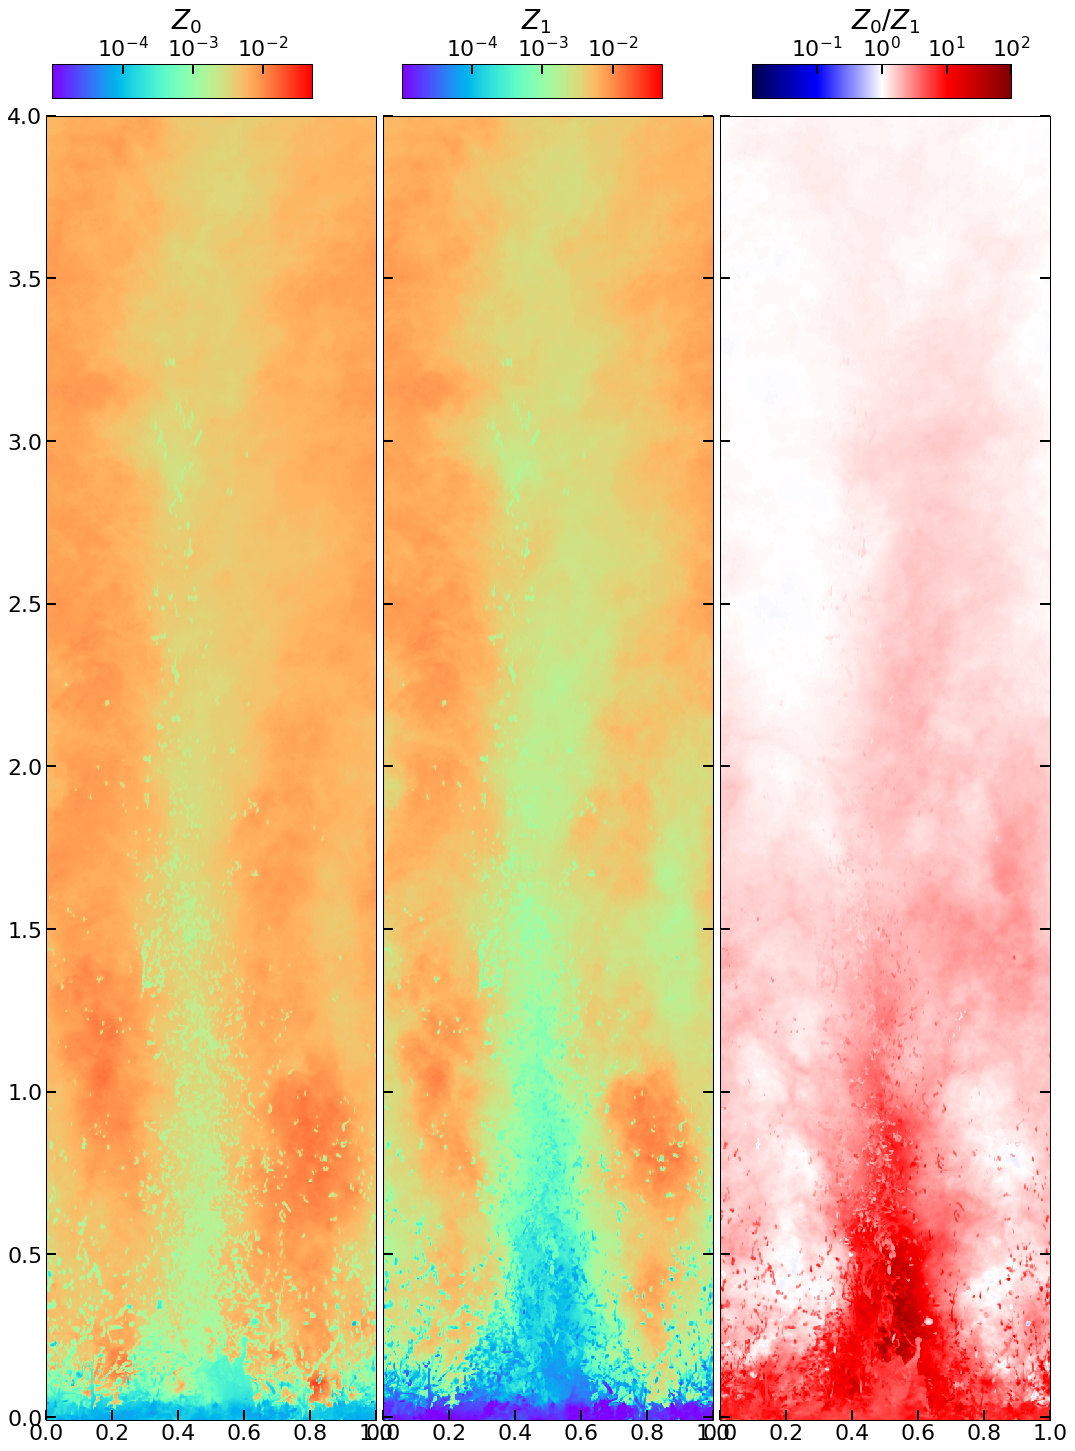

In [69]:
fig, ax = plt.subplots(1, 3, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(18, 24))
i=0

cbarx = 0.13
cbheight = 0.02
cbary = 0.89
cblen = 0.2
dx1 = 0.27
cbtitlex = 0.1
cbtitley = 16.5

max_timestep = np.where(timestep==np.amax(timestep))[0][0]
Ztot = (tot_scal[max_timestep,:,:]/tot_rho[max_timestep,:,:])
Ztot1 = (tot_scal1[max_timestep,:,:]/tot_rho[max_timestep,:,:])
ratio = Ztot/Ztot1

plot = ax[0].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(Ztot),\
                    norm=mcolors.LogNorm(vmin=1.e-5, vmax=5.e-2),
                    cmap='rainbow')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-4, 1.e-3, 1.e-2))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $Z_0$" )

plot = ax[1].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(Ztot1),\
                    norm=mcolors.LogNorm(vmin=1.e-5, vmax=5.e-2),
                    cmap='rainbow')
cax = fig.add_axes([cbarx+dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-4, 1.e-3, 1.e-2))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $Z_1$" )


plot = ax[2].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(ratio),\
                    norm=mcolors.LogNorm(vmin=1.e-2, vmax=1.e2),
                    cmap='seismic')
cax = fig.add_axes([cbarx + 2.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-1, 1., 1.e1, 1.e2))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $Z_0/Z_1$")


ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=True, left=True)
ax[2].tick_params(axis='y', labelleft=False, labelright=False, right=True, left=True)
plt.setp(ax, 'ylim', (-0.01, 4.))

In [70]:
z0 = np.sum(Ztot, axis=0)
z1 = np.sum(Ztot1, axis=0)
rat = np.sum(ratio, axis=0)
rat = (rat + rat[::-1])/2./ncells[0]

(0.0, 4.0)

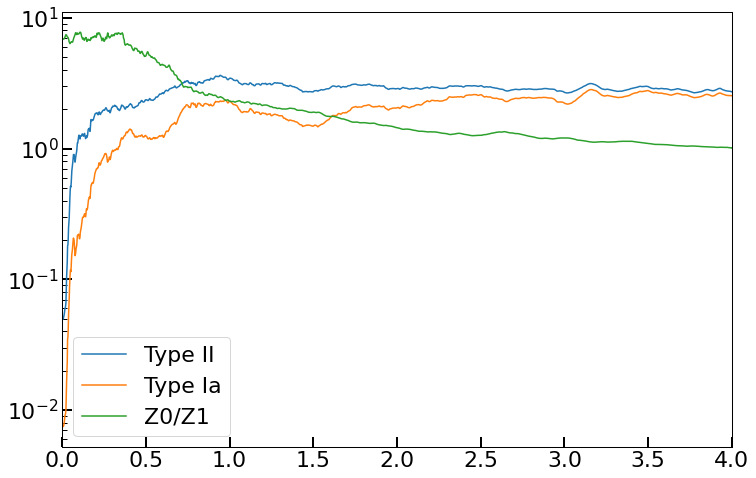

In [71]:
plt.figure(figsize=(12,8))
plt.plot(zrange/kpc,z0, label='Type II')
plt.plot(zrange/kpc, z1, label='Type Ia')
plt.plot(zrange/kpc, rat, label='Z0/Z1')
plt.yscale('log')
plt.legend()
plt.xlim(0.0, 4.)
# plt.ylim(1.e2,1.e4)

(0.01, 1.0)

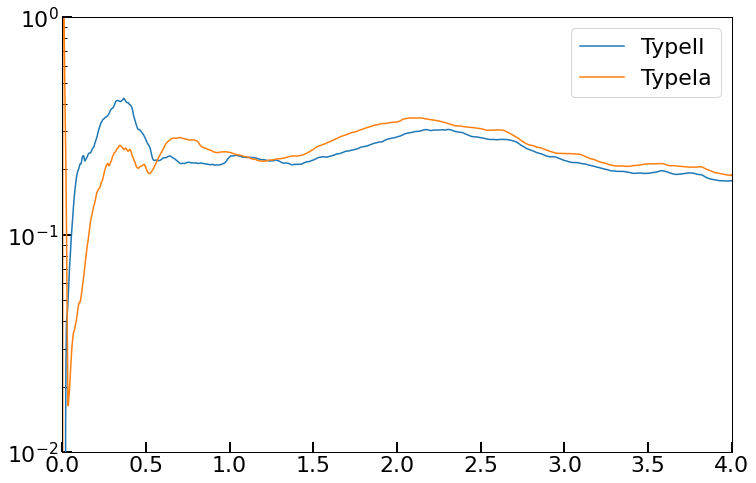

In [9]:
hotZ0_outflow = np.sum(hot_scal_flux, axis=0)/ncells[0]
hotZ1_outflow = np.sum(hot_scal_flux1, axis=0)/ncells[0]

plt.figure(figsize=(12,8))
plt.plot(zrange/kpc, hotZ0_outflow, label='TypeII')
plt.plot(zrange/kpc, hotZ1_outflow, label='TypeIa')

plt.yscale('log')
plt.legend()
plt.xlim(0.0, 4.)
plt.ylim(1.e-2,1.)

(0.0, 4.0)

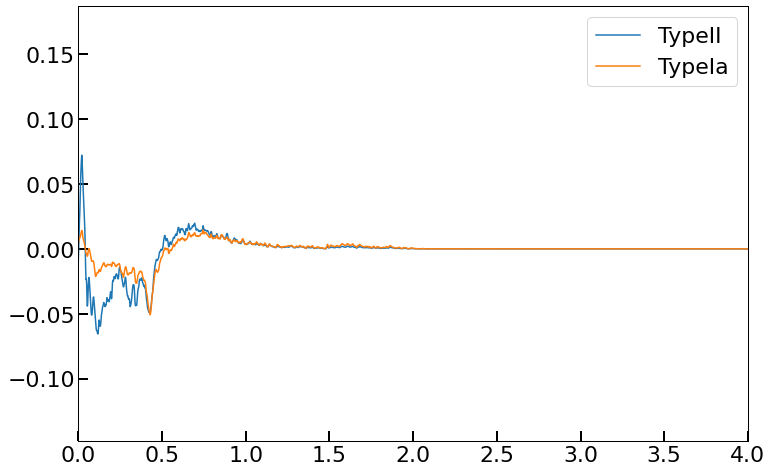

In [11]:
scal_fluxZ0 = np.sum(warm_scal_flux, axis=0)/ncells[0]
scal_fluxZ1 = np.sum(warm_scal_flux1, axis=0)/ncells[0]

plt.figure(figsize=(12,8))
plt.plot(zrange/kpc,scal_fluxZ0, label='TypeII')
plt.plot(zrange/kpc, scal_fluxZ1, label='TypeIa')

# plt.yscale('log')
plt.legend()
plt.xlim(0.0, 4.)
# plt.ylim(0.0,0.025)